In [1]:
import os

In [ ]:
!pip install pytorch-msssim
!git clone https://github.com/danielroich/Face-Identity-Disentanglement-via-StyleGan2.git 'project'
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content')
CODE_DIR = 'project'
os.chdir(f'./{CODE_DIR}')

In [3]:
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/workshop/CNN-project-weights/'

MOBILE_FACE_NET_WEIGHTS_PATH = BASE_PATH + 'mobilefacenet_model_best.pth.tar'
IMAGE_DATA_DIR = BASE_PATH + 'fake/image/'
W_DATA_DIR = BASE_PATH + 'fake/w/'

In [4]:
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torch
import numpy as np
from Utils.data_utils import  WDataSet, make_concat_loaders

In [7]:
data_dir = IMAGE_DATA_DIR

attr_dataset = dset.ImageFolder(root=data_dir, transform= transforms.ToTensor())
id_dataset = dset.ImageFolder(root=data_dir, transform= transforms.ToTensor())
w_dataset = WDataSet(W_DATA_DIR)

In [11]:
batchSize = 3

In [12]:
train_loader = make_concat_loaders(batchSize, (id_dataset, attr_dataset,w_dataset))

mobile net


In [13]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from Models.Encoders.Landmark_Encoder.mobilefacenet import MobileFaceNet

In [18]:
mobilenet = MobileFaceNet([112, 112], 136)

checkpoint = torch.load(MOBILE_FACE_NET_WEIGHTS_PATH)

mobilenet.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [19]:
mobilenet = mobilenet.eval()

In [20]:
mobilenet = mobilenet.cuda()

In [21]:
landmark_transform=transforms.Compose([transforms.Resize(112)])

step by step


In [22]:
id_images, attr_images, ws = next(iter((train_loader)))

In [23]:
inputs = landmark_transform(attr_images[0])

In [24]:
outputs, _ = mobilenet(inputs.cuda())

In [25]:
landmark = torch.reshape(outputs*112, (3, 68, 2))

In [26]:
landmark[:, 17:, :].shape

torch.Size([3, 51, 2])

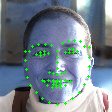

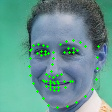

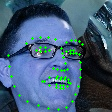

In [30]:
for i in [0,1,2]:
  show_img =  np.array(np.transpose(inputs[i].squeeze().detach().numpy(), (1, 2, 0)))
  show_img = (show_img * 255).astype(np.uint8)
  #np.clip(show_img, 0, 255)
  cv2.imwrite("show_img.jpg", show_img)
  img_clone = cv2.imread("show_img.jpg")
  lnds_ = landmark.cpu().detach().numpy()
  for (x, y) in lnds_[i].astype(np.int32):
      cv2.circle(img_clone, (x, y), 1, (0, 255, 0), -1)
  cv2_imshow(img_clone)

all together



In [31]:
def get_results():
  id_images, attr_images, ws = next(iter((train_loader)))
  inputs = landmark_transform(attr_images[0])
  outputs, _ = mobilenet(inputs.cuda())
  landmark = torch.reshape(outputs*112, (3, 68, 2))
  for i in [0,1,2]:
    show_img =  np.array(np.transpose(inputs[i].squeeze().detach().numpy(), (1, 2, 0)))
    show_img = (show_img * 255).astype(np.uint8)
    cv2.imwrite("show_img.jpg", show_img)
    img_clone = cv2.imread("show_img.jpg")
    lnds_ = landmark.cpu().detach().numpy()
    for (x, y) in lnds_[i].astype(np.int32):
        cv2.circle(img_clone, (x, y), 1, (0, 255, 0), -1)
    cv2_imshow(img_clone)

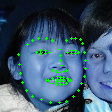

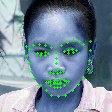

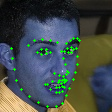

In [32]:
get_results()